In [1]:
# imports
import pandas as pd
from geopy import distance
import io
import csv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from math import sqrt, cos, radians

In [2]:
# read data from csv file, instantiate scaler
data_frame = pd.read_csv("cleanedtraining.csv")
data_frame2 = pd.read_csv('fraudTrain.csv')
scaler = StandardScaler()

In [33]:
print(data_frame.columns)
lat = data_frame2['lat']
lon = data_frame2['long']
lat2 = np.array(lat)
lon2 = np.array(lon)

lat1 = np.array(data_frame.merch_lat)
lon1 = np.array(data_frame.merch_long)
R = 6371
x = (np.radians(lon2) - np.radians(lon1)) * np.cos(0.5 * (np.radians(lat2) + np.radians(lat1)))
y = np.radians(lat2) - np.radians(lat1)
d = R * np.sqrt(x*x + y*y)
data_frame['distance'] = d
           
scaler = StandardScaler()
data = data_frame[['amt', 'distance']]
scaled_amounts = scaler.fit_transform(data)
fraud = data_frame2['is_fraud']
print(scaled_amounts[:,1])
print(scaled_amounts.shape)

Index(['index', 'amt', 'category', 'unix_time', 'merch_lat', 'merch_long',
       'is_fraud', 'distance'],
      dtype='object')
[ 0.08526929 -1.57648372  1.10213326 ...  0.78762035  0.29237963
  0.26578136]
(1296675, 2)


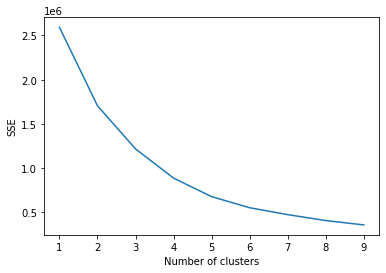

In [4]:
# Implement elbow method
inertia_dict = {}
for n in range(1, 10):
    kmeans = KMeans(n_clusters = n, max_iter = 1000).fit(scaled_amounts)
    inertia_dict[n] = kmeans.inertia_
plt.figure()
plt.plot(list(inertia_dict.keys()), list(inertia_dict.values()))
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.show()




In [34]:
# Using 4 clusters as elbow method suggests
data = np.array(data)
label = KMeans(n_clusters=4, max_iter=1000).fit_predict(data)
print(label)

# now what?


[0 0 0 ... 0 0 0]


Percentage of points that are fraud in cluster 0: 0.2885
Percentage of points that are fraud in cluster 1: 16.6863
Percentage of points that are fraud in cluster 2: 0.0
Percentage of points that are fraud in cluster 3: 0.0


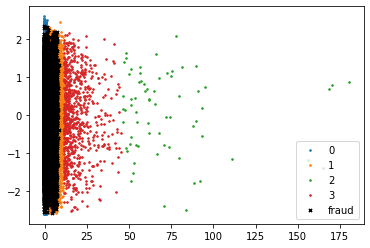

In [58]:
 
u_labels = np.unique(label)
 
#plotting the results:
#print(scaled_data[0,0])
data_frame['labels'] = label
fig = plt.figure()
for i in u_labels:
    # if i == 3 or i == 2:
    #      break
    df = data_frame.loc[data_frame['labels'] == i]
    pf = np.round((df['is_fraud'].sum() / df['is_fraud'].count()) * 100, 4)
    print(f'Percentage of points that are fraud in cluster {i}: {pf}')

    plt.scatter(scaled_amounts[label == i , 0] , scaled_amounts[label == i , 1], label = i , marker=".", s=10)
plt.scatter(scaled_amounts[fraud == 1 , 0] , scaled_amounts[fraud == 1 , 1], label = "fraud" , marker="x", color="black", s=10)


plt.legend()
plt.show()

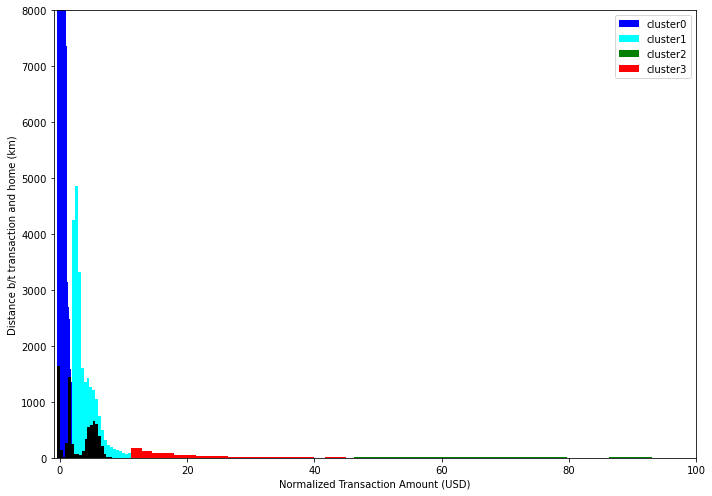

In [70]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from sklearn.metrics import silhouette_score

np.random.seed(23685752)
N_points = 10000
n_bins = 20
x = scaled_amounts
col = ['blue', 'cyan', 'green', 'red']
u_labels = np.unique(label)
fig, axs = plt.subplots(1, 1,
                        figsize =(10, 7),
                        tight_layout = True)
axs.set_xlabel('Normalized Transaction Amount (USD)')
axs.set_ylabel("Distance b/t transaction and home (km)")
for i in u_labels:
 
  axs.set_xlim([-1, 100])
  axs.set_ylim([-1, 8000])
  axs.hist(x[label == i , 0], bins = n_bins, color=col[i], label = f'cluster{i}')

#fig, axs = plt.subplots(1, 1,
#                        figsize =(10, 7),
#                        tight_layout = True)
 
axs.hist(x[fraud == 1 , 0], bins = n_bins, color='black', label = 'fraud')
axs.legend()